<a href="https://colab.research.google.com/github/sachinbb7/Machine-Learning-Projects/blob/main/Jamboree_Education_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Definition :**

Jamboree stands out as India's top institute for preparing for study abroad tests and receiving guidance on admissions.

They boast the industry's highest scores for GMAT and GRE and have facilitated admission offers from renowned global universities for numerous students, helping them fulfill their dreams.

In a recent development, Jamboree introduced a new feature on their website. This feature allows students to assess their likelihood of being accepted into an Ivy League college. By providing an estimate from an Indian standpoint, it helps students gauge their chances of securing admission for their graduate studies.

# **Problem Statement :**

  Analysis to help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# **Column Profiling :**

**Serial Number (Serial No.)**: A unique identifier assigned to each student, represented as an integer.

**GRE Score**: The score obtained in the GRE test on a scale of 0 to 340, recorded as an integer.

**TOEFL Score**: The score achieved in the TOEFL test on a scale of 0 to 120, presented as an integer.

**University Rating**: The rating of the university, assessed on a scale of 0 to 5 and expressed as an integer.

**Strength of Statement of Purpose and Letter of Recommendation (SOP)**: The strength of the recommendation letter or Statement of Purpose (SOP), evaluated on a scale of 0 to 5 and denoted as a floating-point number.

**Undergraduate GPA (CGPA)**: The grade earned in the undergraduate program, measured on a scale of 0 to 10 and presented as a floating-point number.

**Research Experience**: Indicates whether the student possesses any research experience, represented as either 0 or 1 and recorded as an integer.

**Chance of Admission (Chance of Admit)**: The likelihood of securing admission, varying from 0 to 1 and indicated as a floating-point number.

### **Import of Libraries and Data Import**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
!gdown "1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4"

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Admission_Predict_Ver1.1.csv
100% 16.2k/16.2k [00:00<00:00, 38.0MB/s]


In [ ]:
df= pd.read_csv("Admission_Predict_Ver1.1.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit']

In [ ]:
df.drop(columns="Serial No.", inplace=True )

Dropping out Feature "Serial No." as we don't want our model to be build based on this Feature.

### **Data Observations :**

In [ ]:
df.shape

(500, 8)

In [ ]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Observations:**

1. The minimum, maximum and average GRE scores are 290, 340 and 316.47200 respectively.
2. The minimum, maximum and avarage TOEFL scores are 92, 120 and 107.19200 respectively.
3. The minimum, maximum and avarage CGPA are 6.80, 9.92 and 8.57644 respectively.
4. The minimum, maximum and avarage chance of admit are 0.34, 0.97 and 0.72174 respectively.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### **As the dtypes of all categorical attributes are of discrete numbers. Therfore no conversion required**

In [ ]:
df.nunique(dropna=False)

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### **Duplicate's and Null value check :**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

### **No missing values found**

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

## **Univariate Analysis**

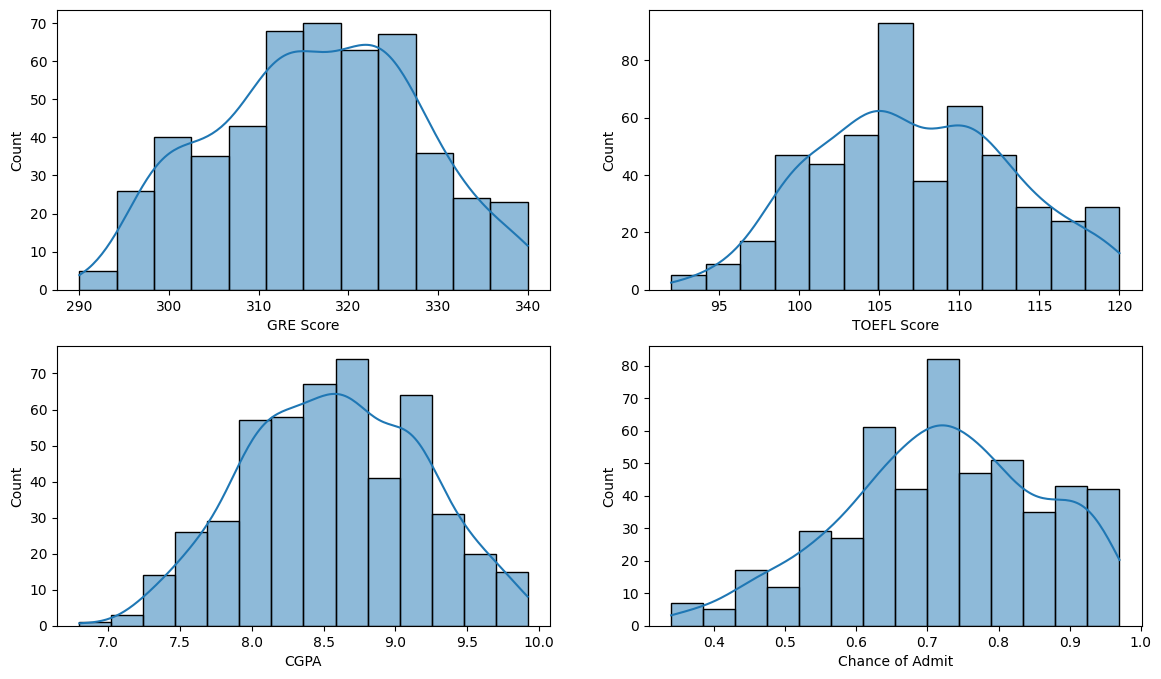

In [ ]:
count, nrows, ncols = 0,2,2

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,8))

for nrows in range(nrows):
  for ncols in range(ncols):
    sns.histplot(data= df, x=num_cols[count],kde=True, ax= axis[nrows, ncols])
    count+=1

sns.histplot(data= df, x= 'Chance of Admit' , kde= True, ax= axis[1,1] )

plt.show()

### **Observations:**

1. From the histplot, we can see that student with CGPA between 8-9.25 applies the most.

2. CGPA and GRE Scores hold the approx. normally distributed curve

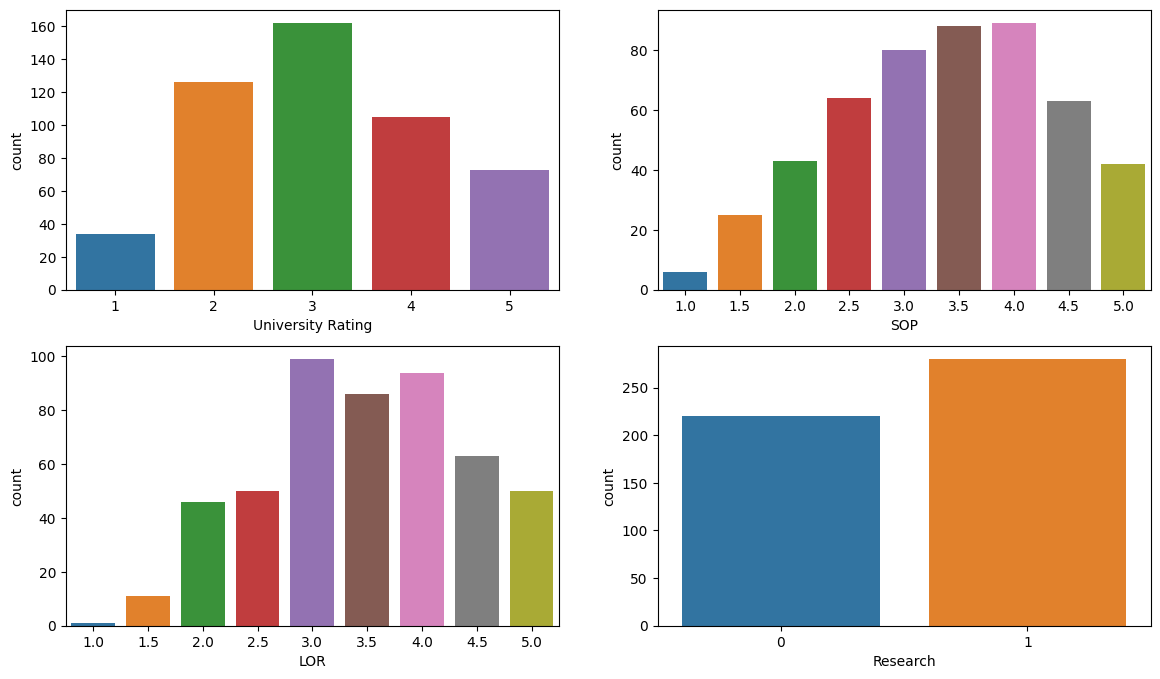

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

count, nrows, ncols = 0,2,2

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,8))

for i in range(nrows):
  for j in range(ncols):
    sns.countplot(data= df, x=cat_cols[count], ax= axis[i, j])
    count+=1


plt.show()

**Observation:**

1. We cannot see significant difference of Students getting into IVY league college even though they do not have any Research Papers done.

2. We can see LOR plays a huge role in getting into IVY league college where having LOR >= 3.0 have the high count of admission.


## **Bivariate and Multi-variate Analysis**

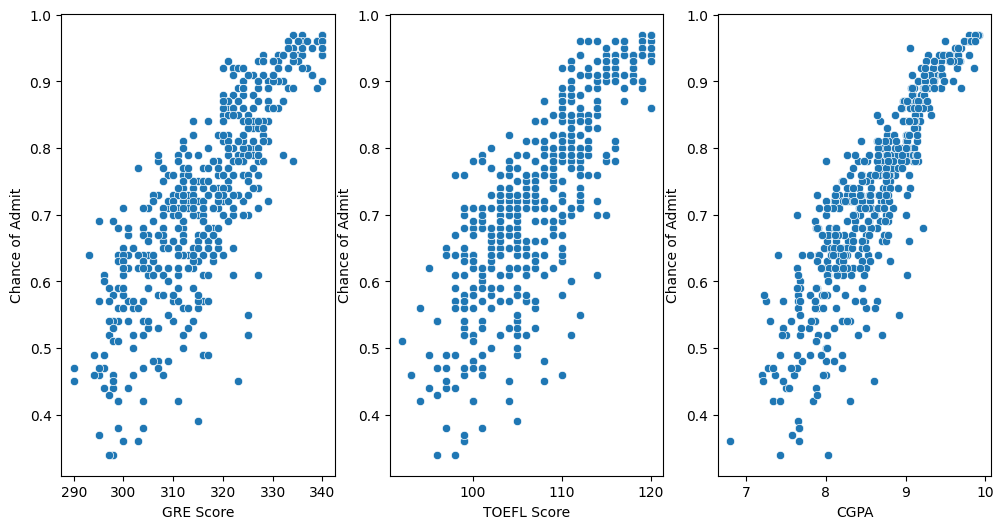

In [ ]:
count, nrows, ncols = 0,1,3

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(12,6))

for ncols in range(ncols):
  sns.scatterplot(data =df , y= target , x= num_cols[count] , ax=axis[ncols] )
  count+=1


plt.show()

<Figure size 600x600 with 0 Axes>

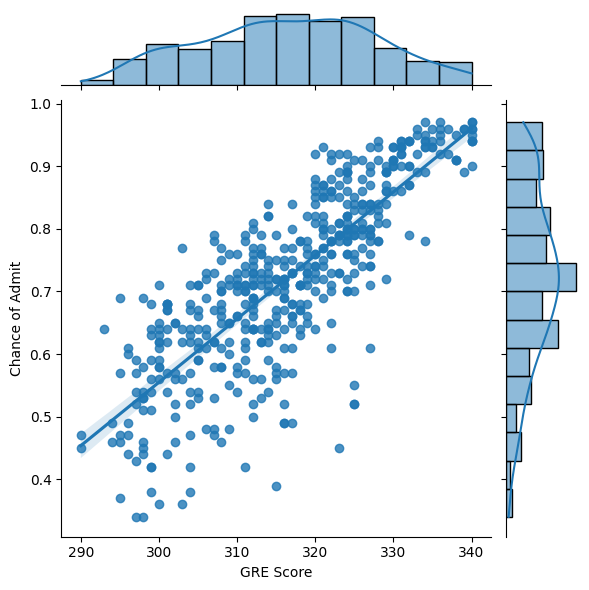

In [ ]:
plt.figure(figsize=(6,6))
sns.jointplot( data=df, kind='reg', x='GRE Score',y='Chance of Admit')
plt.show()

<Figure size 600x600 with 0 Axes>

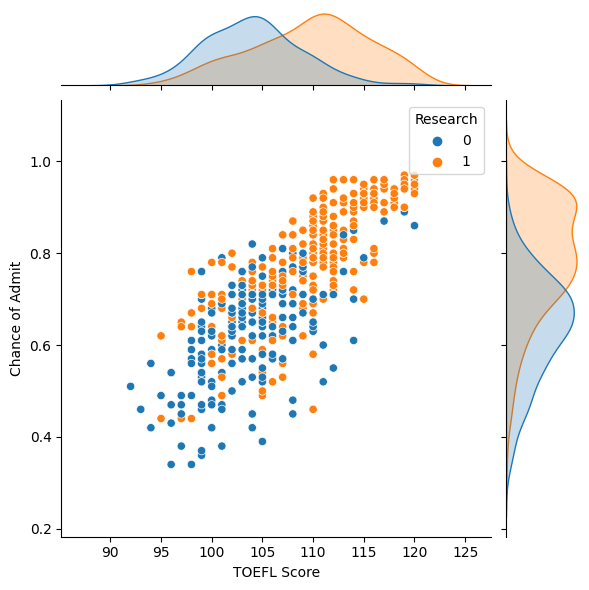

In [ ]:
plt.figure(figsize=(6,6))
sns.jointplot(data=df,x='TOEFL Score',y='Chance of Admit',kind="scatter", hue="Research")
plt.show()




**Observation:**

We can see continuous variables **GRE Score** , **TOEFL Score** and **CGPA** holds true of Linear Regression assumption : "Linearity of Variables"

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


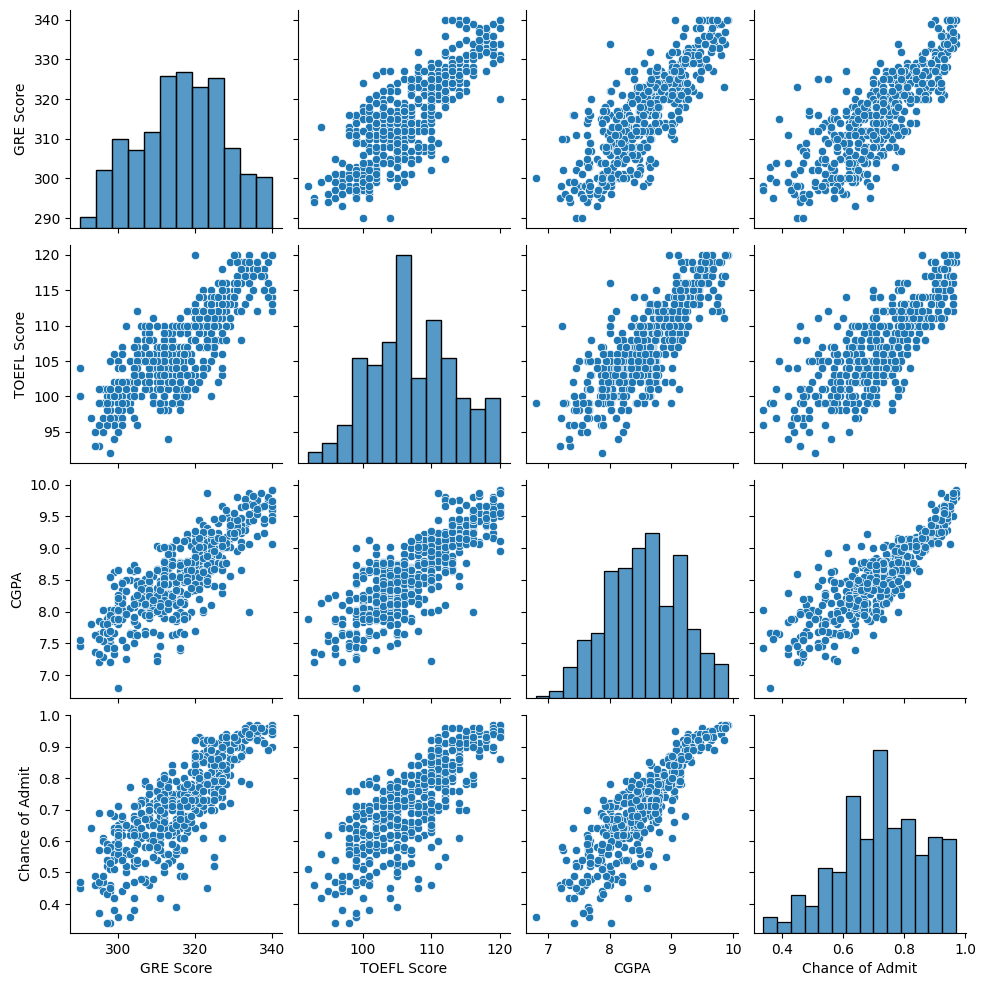

In [ ]:
sns.pairplot(data= df[["GRE Score","TOEFL Score","CGPA", "Chance of Admit"]])

<Axes: >

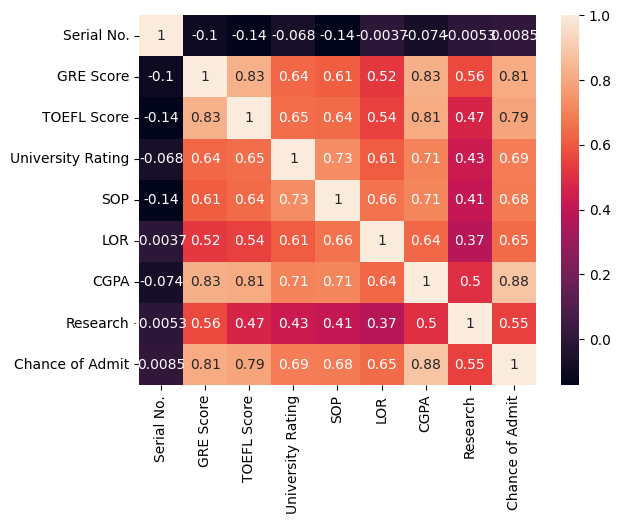

In [ ]:
sns.heatmap(df.corr(), annot=True)

### **Observations from Correlation Heatmap:**

There is a high correlation between:

1. TOEFL score and GRE score.
2. CGPA and university rating.
3. CGPA and SOP.
4. Chance of admit and TOEFL score.
5. TOEFL score and CGPA.
6. GRE score and Chance of admit.
7. Chance of admit and GRE score.
8. CGPA and LOR.
9. CGPA and GRE score.
10. Chance of admit and CGPA.
11. SOP and CGPA.


## **Data Preprocessing and Outlier check**

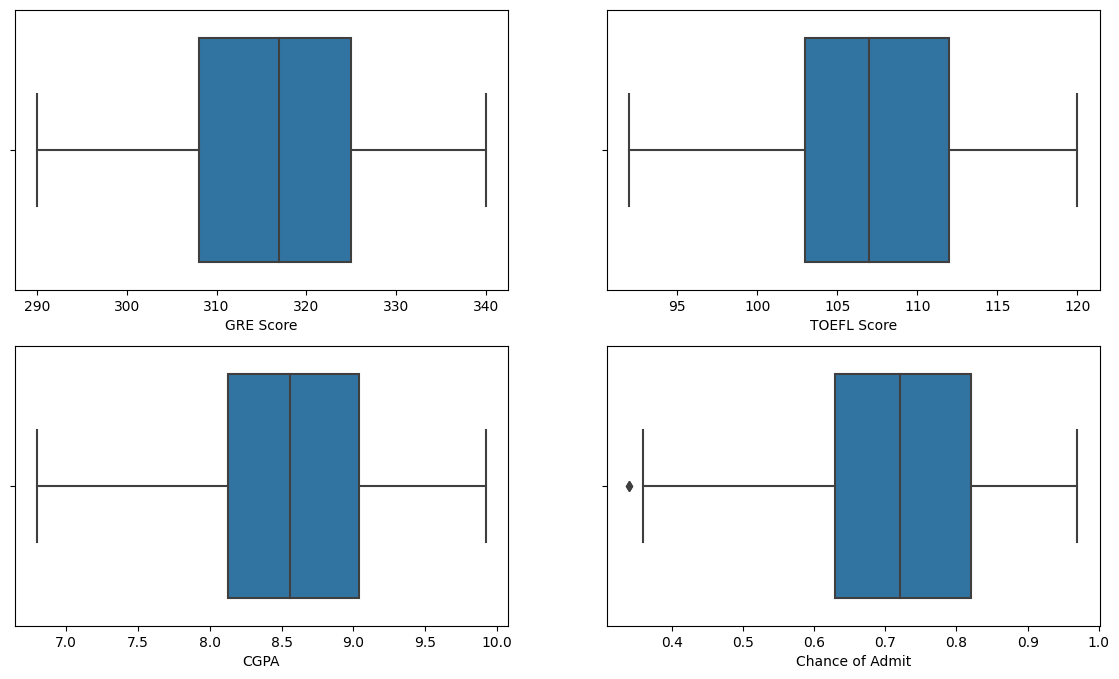

In [ ]:
count, nrows, ncols = 0,2,2

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,8))

for nrows in range(nrows):
  for ncols in range(ncols):
    sns.boxplot(data= df , x= num_cols[count] , ax= axis[nrows, ncols])
    count+=1

sns.boxplot(data= df, x=target, ax= axis[1,1] )

plt.show()

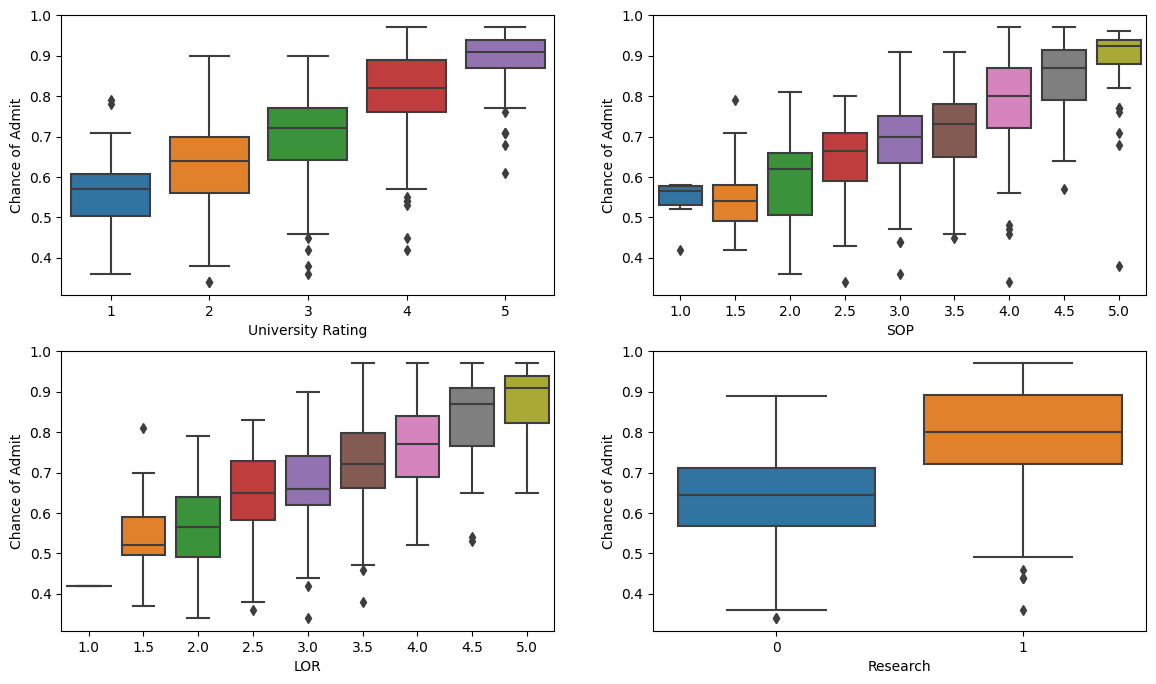

In [ ]:
count, nrows, ncols = 0,2,2

fig,axis = plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,8))

for i in range(nrows):
  for j in range(ncols):
    sns.boxplot(data= df , x= cat_cols[count] ,y=target, ax= axis[i, j])
    count+=1


plt.show()


**Observations from Boxplot:**

- Distribution of **SOP** and **Chance of admit** have large range outliers.

- Distribution of **LOR** and **Chance of admit** have small range outliers.

- Checking Distribution of **University Rating** and **Chance of admit** , we can see that the outliers for universtiy ratings >=3 have more outliers which shows student's tend of apply for top universities even though they don't satisfy the threshold of admission criteria


### **Data preparation for modeling**

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
x_new= df.drop(columns= "Chance of Admit")
y_new= df["Chance of Admit"]

## **Split Train and Test Data**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size=0.2,random_state = 1 )
print(f'train data shape: {x_train.shape} , {y_train.shape}')
print(f'test data shape: {x_test.shape} , {y_test.shape}')


train data shape: (400, 7) , (400,)
test data shape: (100, 7) , (100,)


## **Standardizing the data:**

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_scaled = scaler.transform(x_new)

# **Linear Regression model**

In [ ]:
class LinearRegression():

  def __init__(self,learning_rate=0.01 , iterations =600):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.weights= None
    self.bias = None
    self.error_track = []




  def fit(self,x_train, y_train):
    samples,features = x_train.shape
    self.weights= np.zeros(features)
    self.bias=0
    self.y= []


    for i in range(self.iterations):
      y_hat= np.dot(x_train, self.weights.T) + self.bias
      self.y.append(y_hat)

      error =np.square(np.subtract(y_train,y_hat)).mean()

      self.error_track.append(error)

      dw= (2/samples)* np.dot(x_train.T,(y_hat-y_train))
      db= (2/samples)*np.sum(y_hat-y_train)


      self.weights-= self.learning_rate*dw
      self.bias-= self.learning_rate* db



  def predict(self,x_test):
    y_hat= np.dot(x_test, self.weights) + self.bias
    return y_hat

## **Checking the Reducation in error value over "n" iterations having constant learning rate value**

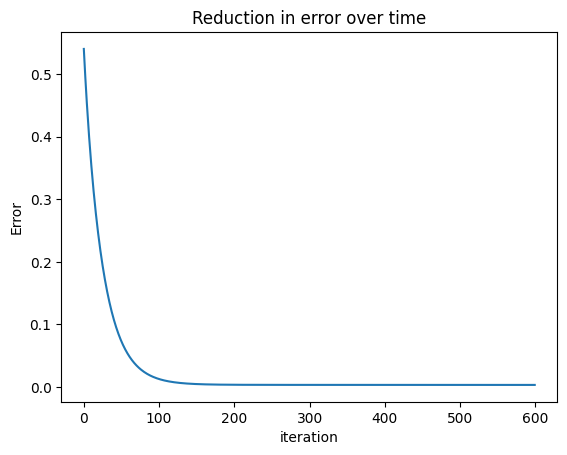

In [ ]:
fig = plt.figure()

model = LinearRegression()
model.fit(x_train, y_train)

plt.title("Reduction in error over time")
plt.plot(model.error_track)
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

## **Metrics model**

In [ ]:
class define_metrics():

  def __init__(self,y_test,y_hat):
    self.y_test = y_test
    self.y_hat= y_hat
    self.p = None

  def r2_score(self):
    ss_res = np.sum((self.y_test-self.y_hat)**2)
    ss_tot = np.sum((self.y_test- self.y_test.mean())**2)
    score = (1- ss_res/ss_tot)
    return round(score,2)

  def mse(self):
    return round(np.sum((self.y_test-self.y_hat)**2) / len(self.y_hat),2)

  def rmse(self):
    return round(np.sqrt(np.sum((self.y_test-self.y_hat)**2) / len(self.y_hat)),2)

  def mae(self):
    return round(np.mean(np.abs((self.y_test) - self.y_hat)),2)


  def adjusted_r2(self,r2_score, p, n):
    """
    n: no of samples
    p: no of predictors
    """
    adj_r2_score = 1 - ((1-r2_score)*(n-1) / (n-p-1))
    return round(adj_r2_score,2)



## **Model coefficients**

In [ ]:
coef_ = pd.DataFrame({"Column": df.columns[:-1].values,"coefficient":model.weights})

## **Train and Test model Performance**

In [ ]:

stats.probplot(residuals, plot=plt)
model = LinearRegression()
model.fit(x_train, y_train)
y_hat_test= model.predict(x_test)


y_hat_train= model.predict(x_train)


score_train = define_metrics(y_train,y_hat_train)
score_test = define_metrics(y_test, y_hat_test)


print("---------Manually built Linear Regression Model---------\n\n")
print("Train and Test Performance: \n")
print(f'Train r2_score : {score_train.r2_score()}    Test r2_score : {score_test.r2_score()}')
print(f'Train adjusted_r2 : {score_train.adjusted_r2(score_train.r2_score(),5,len(y_train))}    Test adjusted_r2 : {score_test.adjusted_r2(score_test.r2_score(),5,len(y_test))}')
print(f'Train MAE : {score_train.mae()}, Test MAE : {score_test.mae()}')
print(f'Train RMSE : {score_train.rmse()}, Test RMSE : {score_test.mae()}')
print(f'model intercept : {model.bias} \n')
print(coef_)


---------Manually built Linear Regression Model---------


Train and Test Performance: 

Train r2_score : 0.82    Test r2_score : 0.82
Train adjusted_r2 : 0.82    Test adjusted_r2 : 0.81
Train MAE : 0.04, Test MAE : 0.04
Train RMSE : 0.06, Test RMSE : 0.04
model intercept : 0.7209210777479237 

              Column  coefficient
0          GRE Score     0.023833
1        TOEFL Score     0.020954
2  University Rating     0.007205
3                SOP     0.004071
4                LOR     0.014097
5               CGPA     0.065190
6           Research     0.009682


## **Observations:**

Manually build model shows train data adjusted r2_score and test data adjusted r2_score stands close to 0.82 and 0.81 respectively.

This indicates the performance of the model is doing better in test data too, avoiding the over-fitting model.

In [ ]:
X_sm = sm.add_constant(x_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        10:16:22   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7209      0.003    238.778      0.0

Observation:

In P>|t|,

H0: coef is zero(Null hypothesis)

Ha: coef is not zero(alternate hypothesis)

P-value of **SOP** and **University Rating** is greater than 0.05, fail to reject the null hypothesis. Therefore SOP coefficient is not significant.

## **Observations:**

We see that the r2_score and adjusted r2_score of manually build model stands close to statsmodel OLS method , indicating manually build model tuning is better.

OLS model shows "**GRE Score**" , "**TOEFL Score**" and "**LOR**" to be significant which have p-value lesser than 0.05

### **Lets drop "SOP" and "University Rating" and perform our Linear Regression**

In [ ]:
x_new.drop(columns = ["SOP", "University Rating"], inplace=True)

In [ ]:
x_new.head()

,GRE Score,TOEFL Score,LOR,CGPA,Research
0,337,118,4.5,9.65,1
1,324,107,4.5,8.87,1
2,316,104,3.5,8.00,1
3,322,110,2.5,8.67,1
4,314,103,3.0,8.21,0


In [ ]:
x_train2, x_test2, y_train2, y_test2= train_test_split(x_new,y_new, test_size=0.2,random_state = 1 )
print(f'train data shape: {x_train2.shape} , {y_train2.shape}')
print(f'test data shape: {x_test2.shape} , {y_test2.shape}')


train data shape: (400, 5) , (400,)
test data shape: (100, 5) , (100,)


In [ ]:
scaler2 = StandardScaler()
scaler2.fit(x_train2)

x_train2= scaler2.transform(x_train2)
x_test2 = scaler2.transform(x_test2)
x_scaled = scaler2.transform(x_new)

In [ ]:
coef2_ = pd.DataFrame({"Column": x_new.columns.values,"coefficient":model2.weights})

In [ ]:
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
y_hat_test2= model2.predict(x_test2)


y_hat_train2= model2.predict(x_train2)


score_train = define_metrics(y_train2,y_hat_train2)
score_test = define_metrics(y_test2, y_hat_test2)


print("---------Manually built Linear Regression model2---------\n\n")
print("Train and Test Performance: \n")
print(f'Train r2_score : {score_train.r2_score()}    Test r2_score : {score_test.r2_score()}')
print(f'Train adjusted_r2 : {score_train.adjusted_r2(score_train.r2_score(),5,len(y_train))}    Test adjusted_r2 : {score_test.adjusted_r2(score_test.r2_score(),5,len(y_test))}')
print(f'Train MAE : {score_train.mae()}, Test MAE : {score_test.mae()}')
print(f'Train RMSE : {score_train.rmse()}, Test RMSE : {score_test.mae()}')
print(f'model2 intercept : {model2.bias} \n')
print(coef2_)


---------Manually built Linear Regression model2---------


Train and Test Performance: 

Train r2_score : 0.82    Test r2_score : 0.82
Train adjusted_r2 : 0.82    Test adjusted_r2 : 0.81
Train MAE : 0.04, Test MAE : 0.04
Train RMSE : 0.06, Test RMSE : 0.04
model2 intercept : 0.7209210777479237 

        Column  coefficient
0    GRE Score     0.023821
1  TOEFL Score     0.022891
2          LOR     0.017713
3         CGPA     0.069101
4     Research     0.010283


## **Observation:**

Even after removing two features we got the similar R2 score.
**As per occam's razor principle we can go with 5 features insteadof 7**

## **Try out Ridge and Lasso regression** (Results without  multicollinearity check)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)],
          ['Ridge Regression :', Ridge(alpha=1.0)]
          ]

print(f"\n\nResults without removing features with multicollinearity ...\n\n")


for name,model in models:
    model.fit(x_train, y_train.values)
    predictions = model.predict(x_test)
    print( name, (np.sqrt(mean_squared_error(y_test, predictions))))



Results without removing features with multicollinearity ...


Linear Regression : 0.0588141045765077
Lasso Regression : 0.11793103455563164
Ridge Regression : 0.0588312561196479


## **Testing the assumptions of the linear regression model**

## **VIF(Variance Inflation Factor)**

VIF score of an independent variable represents how well the variable is explained by other independent variables.

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.



### **Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)**

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train, columns=x_new.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.88
5,CGPA,4.75
1,TOEFL Score,4.26
3,SOP,2.92
2,University Rating,2.80
4,LOR,2.08
6,Research,1.51


### **Observation:**

It can be observed that every column has a VIF less than 5. Therefore no multi-collinearity found

### **Mean of Residuals**

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

In [ ]:
residuals = y_test.values-y_hat_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.003997595284369264


### **Observation:**

Mean of Residual is close to zero, satisfies the condition of Linear Regression

Since the mean of residuals is very close to 0, we can say that the model is unbiased


## **Test for Homoscedasticity**


Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

(-0.1, 1.0)

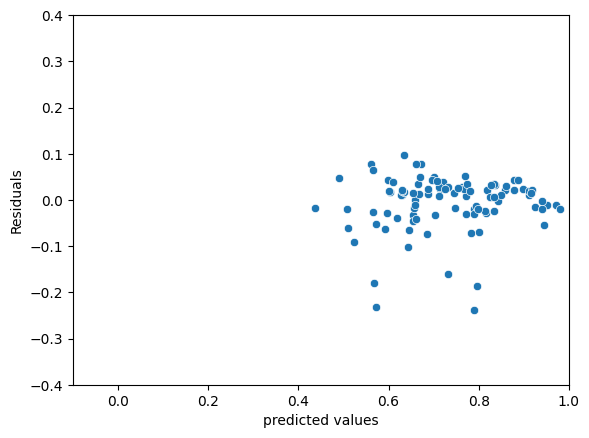

In [ ]:
p = sns.scatterplot(x=y_hat_test,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(-0.1,1)

### **Observation:**

 We see that the variability of the residuals (the differences between the observed and predicted values) is constant across all levels of the independent variable(s).

## **Linearity of variables (no pattern in the residual plot)**

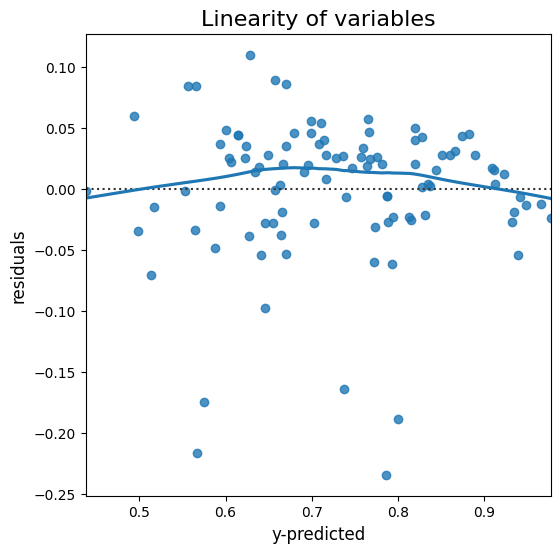

In [ ]:
plt.figure(figsize=(6,6))

sns.residplot(y= residuals, x= y_hat_test, lowess =True)
plt.xlabel('y-predicted', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.title("Linearity of variables" , fontsize=16)
plt.show()

### **Observation**:

Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists


## **Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)**

(0.2, 0.991)

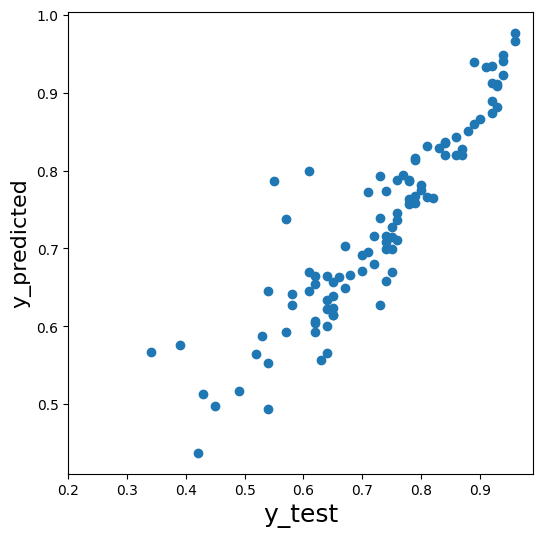

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(x= y_test.values, y= y_hat_test)
fig.suptitle('y_test vs y_hat_test', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_predicted', fontsize=16)
plt.xlim(0.2,)

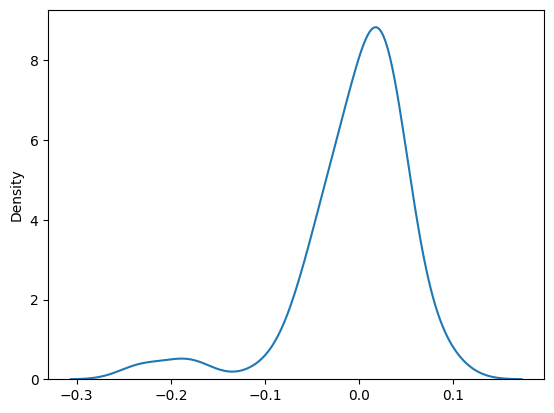

In [ ]:
sns.kdeplot(residuals)

plt.show()

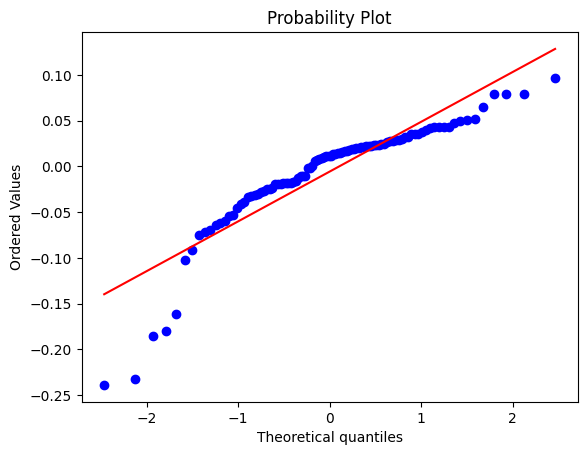

In [ ]:
stats.probplot(residuals, plot=plt)
plt.show()

### **Observations:**

Residual do follow the Normal distribution here (almost bell-shaped curve in residuals distribution)

QQ-plot : Except few outliers, almost all residuals points tends to fall on the QQ-line

## **Insights:**


1. The chances of admission variable has a left-leaning distribution (left skewed Normal distribution)

2. Categorical factors like university ranking, research, SOP quality, and LOR exhibit a positive trend with admission chances.

3.  Exam scores (CGPA/GRE/TOEFL) are strongly positively linked to admission chances.

4.  The top-performing Linear Regression and Ridge Regression models have successfully explained 82% of the variability in the admission chances.

5. Analyzing the model coefficients, we find that CGPA is the most crucial predictor, while SOP and University Rating have the least impact.


## **Recommendations:**

1. Most of the research activities happen in the best universities. Having research experience increases your chances of getting into top universities

2.  If you have a good CGPA, a high TOEFL score boosts your chances of getting into top universities. So, paying attention to your TOEFL score can improve your chances.

3. If you already have a good CGPA and a high TOEFL score, having a high GRE score increases your chances of getting into top universities. So, giving importance to your GRE score can slightly improve your chances.

4. It is recommended to add more independent features for better prediction.
Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables